<a href="https://colab.research.google.com/github/mkatepallewar/EDA-Project/blob/master/1000_Movies_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
  - 3.3 [Observations from Pandas Profiling before Data Processing](#section303)<br>
4. [Data Normalisation](#section4)<br>
  - 4.1 [Standardize all column headers](#section401)<br>
  - 4.2 [Rename Columns](#section402)<br>
  - 4.3 [Missing Data and Its Manipulation](#section403)<br>
  - 4.4 [Spliting Actors and Genre in Multiple Columns](#section404)<br>
  - 4.5 [Remove Columns](#section405)<br>
  - 4.6 [Pandas Profiling after Data Preprocessing](#section406)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Analysis Based on Category](#section501)<br>
      - 5.1.0 [Important Data Analysis](#section501.0)<br>
      - 5.1.1 [Movies Produced by Year](#section501.1)<br>
      - 5.1.2 [Movies by Genre](#section501.2)<br>
      - 5.1.3 [Top 10 rated movies](#section501.3)<br>
      - 5.1.4 [Top 10 Movies Produced by Director](#section501.4)<br>
      - 5.1.5 [Successful Director - Highest Revenue and good rating](#section501.5)<br>
      - 5.1.6 [Top Movies By Ratings](#section501.6)<br>
      - 5.1.7 [Top Movies By Revenue](#section501.7)<br>
      - 5.1.8 [Top Movies By Actors](#section501.8)<br>
      - 5.1.9 [Top Movies By Genre -Revenue](#section501.9)<br>
  - 5.2 [Analysis Through Questions](#section502)<br>
      - 5.2.1 [Which Genre Has the Highest Revenue](#section502.1)<br>
      - 5.2.2 [Which Genre Has The Highest Release Of Movies?](#section502.2)<br>
      - 5.2.3 [What are the successful Genre](#section502.3)<br>
      - 5.2.4 [What movies have low ratings but high revenue](#section502.4)<br>
      - 5.2.5 [What movies have high ratings but low revenue](#section502.5)<br>
      - 5.2.6 [Top revenue generated movies per year](#section502.6)<br>
      - 5.2.7 [Highest revenue generated movies till date](#section502.7)<br>
      - 5.2.8 [Trends](#section502.8)<br>
          - 5.2.8.1 [Trends-Ratings](#section502.8.1)<br>
          - 5.2.8.2 [Trends-Revenue](#section502.8.2)<br>
          - 5.2.8.3 [Trends-Runtime](#section502.8.3)<br>
6. [Conclusion](#section6)<br>


<a id=section1></a>
## 1. Problem Statement
This dataset is a collection of details about the 1000 movies released in between 2006 - 2016. My aim is to derive some insights about the movies that broke all barriers and created records (both ways :) )

<a id=section2></a>
## 2. Importing Packages

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [0]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (4.3.0)


In [0]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [0]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

In [0]:
df_movies=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv",sep=",")
df_movies.head(20)

Rank                                    Title                       Genre  \
0   1     Guardians of the Galaxy                  Action,Adventure,Sci-Fi      
1   2     Prometheus                               Adventure,Mystery,Sci-Fi     
2   3     Split                                    Horror,Thriller              
3   4     Sing                                     Animation,Comedy,Family      
4   5     Suicide Squad                            Action,Adventure,Fantasy     
5   6     The Great Wall                           Action,Adventure,Fantasy     
6   7     La La Land                               Comedy,Drama,Music           
7   8     Mindhorn                                 Comedy                       
8   9     The Lost City of Z                       Action,Adventure,Biography   
9   10    Passengers                               Adventure,Drama,Romance      
10  11    Fantastic Beasts and Where to Find Them  Adventure,Family,Fantasy     
11  12    Hidden Figures                           Biography,Drama,History      
12  13    Rogue One                                Action,Adventure,Sci-Fi      
13  14    Moana                                    Animation,Adventure,Comedy   
14  15    Colossal                                 Action,Comedy,Drama          
15  16    The Secret Life of Pets                  Animation,Adventure,Comedy   
16  17    Hacksaw Ridge                            Biography,Drama,History      
17  18    Jason Bourne                             Action,Thriller              
18  19    Lion                                     Biography,Drama              
19  20    Arrival                                  Drama,Mystery,Sci-Fi         

                                                                                                                                                                                                                                                    Description  \
0   A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.                                                                                                                               
1   Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.                                                                                                                               
2   Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.                                                                                                 
3   In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.                                
4   A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.                                                                           
5   European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.                                                                                                            
6   A jazz pianist falls for an aspiring actress in Los Angeles.                                                                                                                                                                                                  
7   A has-been actor best known for playing the title character in the 1980s detective series "Mindhorn" must work with the police when a serial killer says that he will only speak with Detective Mindhorn, whom he believes to be a

- This dataset provide information of movies released between 2006 to 2016 and their ratings with Revenue generation.
- This dataset also provide movie rank and type of the movie whether it is Sci-Fi, Adventure etc and their primary cast and Director.
  

<a id=section301></a>
# 3.1 Description of the Datasets

In [0]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


- ```info``` function gives us the following insights into the df_movies dataframe:

  - There are a total of **1000 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **4 columns** with a **numeric** datatype, **3 columns** with an **float** datatype and **5 columns** with an      **object** datatype.
  
  - There are **0 missing** values in the data.

In [0]:
df_movies.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000  1000.000000        1000.000000  1.000000e+03   
mean   500.500000   2012.783000  113.172000         6.723200     1.698083e+05   
std    288.819436   3.205962     18.810908          0.945429     1.887626e+05   
min    1.000000     2006.000000  66.000000          1.900000     6.100000e+01   
25%    250.750000   2010.000000  100.000000         6.200000     3.630900e+04   
50%    500.500000   2014.000000  111.000000         6.800000     1.107990e+05   
75%    750.250000   2016.000000  123.000000         7.400000     2.399098e+05   
max    1000.000000  2016.000000  191.000000         9.000000     1.791916e+06   

       Revenue (Millions)   Metascore  
count  872.000000          936.000000  
mean   82.956376           58.985043   
std    103.253540          17.194757   
min    0.000000            11.000000   
25%    13.270000           47.000000   
50%    47.985000           59.500000   
75%    113.715000          72.000000   
max    936.630000          100.000000

In [0]:
df_movies.describe(include='all')

Rank     Title                    Genre  \
count   1000.000000  1000      1000                      
unique NaN           999       207                       
top    NaN           The Host  Action,Adventure,Sci-Fi   
freq   NaN           2         50                        
mean    500.500000   NaN       NaN                       
std     288.819436   NaN       NaN                       
min     1.000000     NaN       NaN                       
25%     250.750000   NaN       NaN                       
50%     500.500000   NaN       NaN                       
75%     750.250000   NaN       NaN                       
max     1000.000000  NaN       NaN                       

                                                                                                                                                                                             Description  \
count   1000                                                                                                                                                                                               
unique  1000                                                                                                                                                                                               
top     The dwarves, along with Bilbo Baggins and Gandalf the Grey, continue their quest to reclaim Erebor, their homeland, from Smaug. Bilbo Baggins is in possession of a mysterious and magical ring.   
freq    1                                                                                                                                                                                                  
mean    NaN                                                                                                                                                                                                
std     NaN                                                                                                                                                                                                
min     NaN                                                                                                                                                                                                
25%     NaN                                                                                                                                                                                                
50%     NaN                                                                                                                                                                                                
75%     NaN                                                                                                                                                                                                
max     NaN                                                                                                                                                                                                

            Director  \
count   1000           
unique  644            
top     Ridley Scott   
freq    8              
mean    NaN            
std     NaN            
min     NaN            
25%     NaN            
50%     NaN            
75%     NaN            
max     NaN            

                                                                     Actors  \
count   1000                                                                  
unique  996                                                                   
top     Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson   
freq    2                                                                     
mean    NaN                                                                   
std     NaN                                                                   
min     NaN                

**Observations**
- Looks like there are few missing value for - Title, Revenue and Metascore. We need to remove these values (missing rows) from analysis.
- There are two movies with same title.

- Revenue is not normally distributed mean and median are having huge gap -*mean=82.956376* and *median=47.985000"
- Ratings of the movies are evenalyy distributed

<a id=section302></a>
# 3.2 Pandas Profiling before Data Preprocessing

In [0]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\programdata\anaconda3\lib\site-packages (2.3.0)


In [0]:
import pandas_profiling

In [0]:
profile=df_movies.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})
# profile.to_file(output_file="profiling_before_preprocessing.html")
profile

<a id=section303></a>
# 3.3 Observations from Pandas Profiling before Data Processing


*Dataset info:*
    - Number of variables: 12
    - Number of observations: 1000
    - Missing cells: 192 (1.6%)
*Variables types:*
    - Numeric = 7
    - Categorical = 4
    - Text (Unique) = 1
    - Rejected = 0

- Summary of the datatypes:
    - Numeric: Metascore, Rank, Rating, Revenue, Runtime, Votes and Year
    - Categorical: Title, Description, Actors, Director and Genre
- Genre has 207 distinct responses. This is because the movies might be falling into multiple Genres.
- Actors is a collection of main actors of the movie.
- Rating is between 1 to 10.
- The following variables have null values that may need to addressed.
     - Revenue (Millions): There are 128 missing values. It might be for several reasons that the data is not available. Maybe the movie didnt collect any revenue
     - Metascore: There are 64 missing values. "Movies will get a Metascore only if critics's reviews are collected. Metascore is considered the rating of a film." So, it is very much possible that these movies were not reviewed by that many critics. So this seems to be an optional column or just critic rating.


**Normalisations:**

**Variables to transform prior to analysis:**
    - Standardize all column headers to lower case (to prevent typos!)
    - Rename 'Revenue (Millions)' and 'Runtime (Minutes)' to something simpler.
    - Split Actors and Genres to multiple columns
    - It will be important to decide how to handle NaN values for Revenue.


<a id=section4></a>
# 4 Data Normalisation

<a id=section401></a>
### 4.1 Standardize all column headers to lower case

In [0]:
df_movies.columns=map(str.lower,df_movies.columns)
df_movies.dtypes

rank                  int64  
title                 object 
genre                 object 
description           object 
director              object 
actors                object 
year                  int64  
runtime_(minutes)     int64  
rating                float64
votes                 int64  
revenue_(millions)    float64
metascore             float64
dtype: object

<a id=section402></a>
### 4.2 Rename Columns

In [0]:
df_movies=df_movies.rename(columns ={'runtime_(minutes)':'runtime'})
df_movies=df_movies.rename(columns={'revenue_(millions)':'revenue'})
df_movies

rank                                    title  \
0    1     Guardians of the Galaxy                   
1    2     Prometheus                                
2    3     Split                                     
3    4     Sing                                      
4    5     Suicide Squad                             
5    6     The Great Wall                            
6    7     La La Land                                
7    8     Mindhorn                                  
8    9     The Lost City of Z                        
9    10    Passengers                                
10   11    Fantastic Beasts and Where to Find Them   
11   12    Hidden Figures                            
12   13    Rogue One                                 
13   14    Moana                                     
14   15    Colossal                                  
15   16    The Secret Life of Pets                   
16   17    Hacksaw Ridge                             
17   18    Jason Bourne                              
18   19    Lion                                      
19   20    Arrival                                   
20   21    Gold                                      
21   22    Manchester by the Sea                     
22   23    Hounds of Love                            
23   24    Trolls                                    
24   25    Independence Day: Resurgence              
25   26    Paris pieds nus                           
26   27    Bahubali: The Beginning                   
27   28    Dead Awake                                
28   29    Bad Moms                                  
29   30    Assassin's Creed                          
..   ..                 ...                          
970  971   Texas Chainsaw 3D                         
971  972   Disturbia                                 
972  973   Rock of Ages                              
973  974   Scream 4                                  
974  975   Queen of Katwe                            
975  976   My Big Fat Greek Wedding 2                
976  977   Dark Places                               
977  978   Amateur Night                             
978  979   It's Only the End of the World            
979  980   The Skin I Live In                        
980  981   Miracles from Heaven                      
981  982   Annie                                     
982  983   Across the Universe                       
983  984   Let's Be Cops                             
984  985   Max                                       
985  986   Your Highness                             
986  987   Final Destination 5                       
987  988   Endless Love                              
988  989   Martyrs                                   
989  990   Selma                                     
990  991   Underworld: Rise of the Lycans            
991  992   Taare Zameen Par                          
992  993   Take Me Home Tonight                      
993  994   Resident Evil: Afterlife                  
994  995   Project X                                 
995  996   Secret in Their Eyes                      
996  997   Hostel: Part II                           
997  998   Step Up 2: The Streets                    
998  999   Search Party                              
999  1000  Nine Lives                                

                          genre  \
0    Action,Adventure,Sci-Fi      
1    Adventure,Mystery,Sci-Fi     
2    Horror,Thriller              
3    Animation,Comedy,Family      
4    Action,Adventure,Fantasy     
5    Action,Adventure,Fantasy     
6    Comedy,Drama,Music           
7    Comedy                       
8    Action,Adventure,Biography   
9    Adventure,Drama,Romance      
10   Adventure,Family,Fantasy     
11   Biography,Drama,History      
12   Action,Adventure,Sci-Fi      
13   Animation,Adventure,Comedy   
14   Action,Comedy,Drama          
15   Animation,Adventure,Comedy   
16   Biography,Drama,History      
17   Action,Thriller      

<a id=section403></a>
### 4.3 Missing Data and Its Manipulation

In [0]:
total=df_movies.isnull().sum().sort_values(ascending=False)
percent=(df_movies.isnull().sum()/df_movies.isnull().count()).sort_values(ascending=False)

missign_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
print(missign_data)

             Total  Percent
revenue      128    0.128  
metascore    64     0.064  
votes        0      0.000  
rating       0      0.000  
runtime      0      0.000  
year         0      0.000  
actors       0      0.000  
director     0      0.000  
description  0      0.000  
genre        0      0.000  
title        0      0.000  
rank         0      0.000  


<a id=section404></a>
### 4.4 Spliting Actors and Genre in Multiple Columns

In [0]:
actors_df=df_movies['actors'].str.split(',',expand=True).rename(columns=lambda x:f'actor_{x+1}')
df_movies=pd.concat([df_movies,actors_df],axis=1,sort=False)
df_movies

genre_df=df_movies['genre'].str.split(',',expand=True).rename(columns=lambda x:f'genre_{x+1}')
df_movies=pd.concat([df_movies,genre_df],axis=1,sort=False)
df_movies

rank                                    title  \
0    1     Guardians of the Galaxy                   
1    2     Prometheus                                
2    3     Split                                     
3    4     Sing                                      
4    5     Suicide Squad                             
5    6     The Great Wall                            
6    7     La La Land                                
7    8     Mindhorn                                  
8    9     The Lost City of Z                        
9    10    Passengers                                
10   11    Fantastic Beasts and Where to Find Them   
11   12    Hidden Figures                            
12   13    Rogue One                                 
13   14    Moana                                     
14   15    Colossal                                  
15   16    The Secret Life of Pets                   
16   17    Hacksaw Ridge                             
17   18    Jason Bourne                              
18   19    Lion                                      
19   20    Arrival                                   
20   21    Gold                                      
21   22    Manchester by the Sea                     
22   23    Hounds of Love                            
23   24    Trolls                                    
24   25    Independence Day: Resurgence              
25   26    Paris pieds nus                           
26   27    Bahubali: The Beginning                   
27   28    Dead Awake                                
28   29    Bad Moms                                  
29   30    Assassin's Creed                          
..   ..                 ...                          
970  971   Texas Chainsaw 3D                         
971  972   Disturbia                                 
972  973   Rock of Ages                              
973  974   Scream 4                                  
974  975   Queen of Katwe                            
975  976   My Big Fat Greek Wedding 2                
976  977   Dark Places                               
977  978   Amateur Night                             
978  979   It's Only the End of the World            
979  980   The Skin I Live In                        
980  981   Miracles from Heaven                      
981  982   Annie                                     
982  983   Across the Universe                       
983  984   Let's Be Cops                             
984  985   Max                                       
985  986   Your Highness                             
986  987   Final Destination 5                       
987  988   Endless Love                              
988  989   Martyrs                                   
989  990   Selma                                     
990  991   Underworld: Rise of the Lycans            
991  992   Taare Zameen Par                          
992  993   Take Me Home Tonight                      
993  994   Resident Evil: Afterlife                  
994  995   Project X                                 
995  996   Secret in Their Eyes                      
996  997   Hostel: Part II                           
997  998   Step Up 2: The Streets                    
998  999   Search Party                              
999  1000  Nine Lives                                

                          genre  \
0    Action,Adventure,Sci-Fi      
1    Adventure,Mystery,Sci-Fi     
2    Horror,Thriller              
3    Animation,Comedy,Family      
4    Action,Adventure,Fantasy     
5    Action,Adventure,Fantasy     
6    Comedy,Drama,Music           
7    Comedy                       
8    Action,Adventure,Biography   
9    Adventure,Drama,Romance      
10   Adventure,Family,Fantasy     
11   Biography,Drama,History      
12   Action,Adventure,Sci-Fi      
13   Animation,Adventure,Comedy   
14   Action,Comedy,Drama          
15   Animation,Adventure,Comedy   
16   Biography,Drama,History      
17   Action,Thriller      

<a id=section405></a>
### 4.4 Remove Columns

In [0]:
#Drop now actors and Genre column

df_movies=df_movies.drop(['genre','actors','description'],axis=1)
df_movies

rank                                    title               director  \
0    1     Guardians of the Galaxy                  James Gunn              
1    2     Prometheus                               Ridley Scott            
2    3     Split                                    M. Night Shyamalan      
3    4     Sing                                     Christophe Lourdelet    
4    5     Suicide Squad                            David Ayer              
5    6     The Great Wall                           Yimou Zhang             
6    7     La La Land                               Damien Chazelle         
7    8     Mindhorn                                 Sean Foley              
8    9     The Lost City of Z                       James Gray              
9    10    Passengers                               Morten Tyldum           
10   11    Fantastic Beasts and Where to Find Them  David Yates             
11   12    Hidden Figures                           Theodore Melfi          
12   13    Rogue One                                Gareth Edwards          
13   14    Moana                                    Ron Clements            
14   15    Colossal                                 Nacho Vigalondo         
15   16    The Secret Life of Pets                  Chris Renaud            
16   17    Hacksaw Ridge                            Mel Gibson              
17   18    Jason Bourne                             Paul Greengrass         
18   19    Lion                                     Garth Davis             
19   20    Arrival                                  Denis Villeneuve        
20   21    Gold                                     Stephen Gaghan          
21   22    Manchester by the Sea                    Kenneth Lonergan        
22   23    Hounds of Love                           Ben Young               
23   24    Trolls                                   Walt Dohrn              
24   25    Independence Day: Resurgence             Roland Emmerich         
25   26    Paris pieds nus                          Dominique Abel          
26   27    Bahubali: The Beginning                  S.S. Rajamouli          
27   28    Dead Awake                               Phillip Guzman          
28   29    Bad Moms                                 Jon Lucas               
29   30    Assassin's Creed                         Justin Kurzel           
..   ..                 ...                                   ...           
970  971   Texas Chainsaw 3D                        John Luessenhop         
971  972   Disturbia                                D.J. Caruso             
972  973   Rock of Ages                             Adam Shankman           
973  974   Scream 4                                 Wes Craven              
974  975   Queen of Katwe                           Mira Nair               
975  976   My Big Fat Greek Wedding 2               Kirk Jones              
976  977   Dark Places                              Gilles Paquet-Brenner   
977  978   Amateur Night                            Lisa Addario            
978  979   It's Only the End of the World           Xavier Dolan            
979  980   The Skin I Live In                       Pedro Almodóvar         
980  981   Miracles from Heaven                     Patricia Riggen         
981  982   Annie                                    Will Gluck              
982  983   Across the Universe                      Julie Taymor            
983  984   Let's Be Cops                            Luke Greenfield         
984  985   Max                                      Boaz Yakin              
985  986   Your Highness                            David Gordon Green      
986  987   Final Destination 5                      Steven Quale            
987  988   Endless Love                             Shana Feste             
988  989   Martyrs                                  Pascal Laugier          
989  990   Selma                                    Ava DuVernay            
9

<a id=section406></a>
### 4.5 Pandas Profiling after Data Preprocessing

In [0]:
df_movies.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

<a id=section5></a>
# 5 Exploratory Data Analysis (EDA)

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>
### 5.1 Analysis Based on Category

<a id=section501.0></a>
### 5.1.0 Important Data Analysis

<a id=section501.1></a>
### 5.1.1 Movies Produced by Year

Text(0, 0.5, 'Number Of Movies')

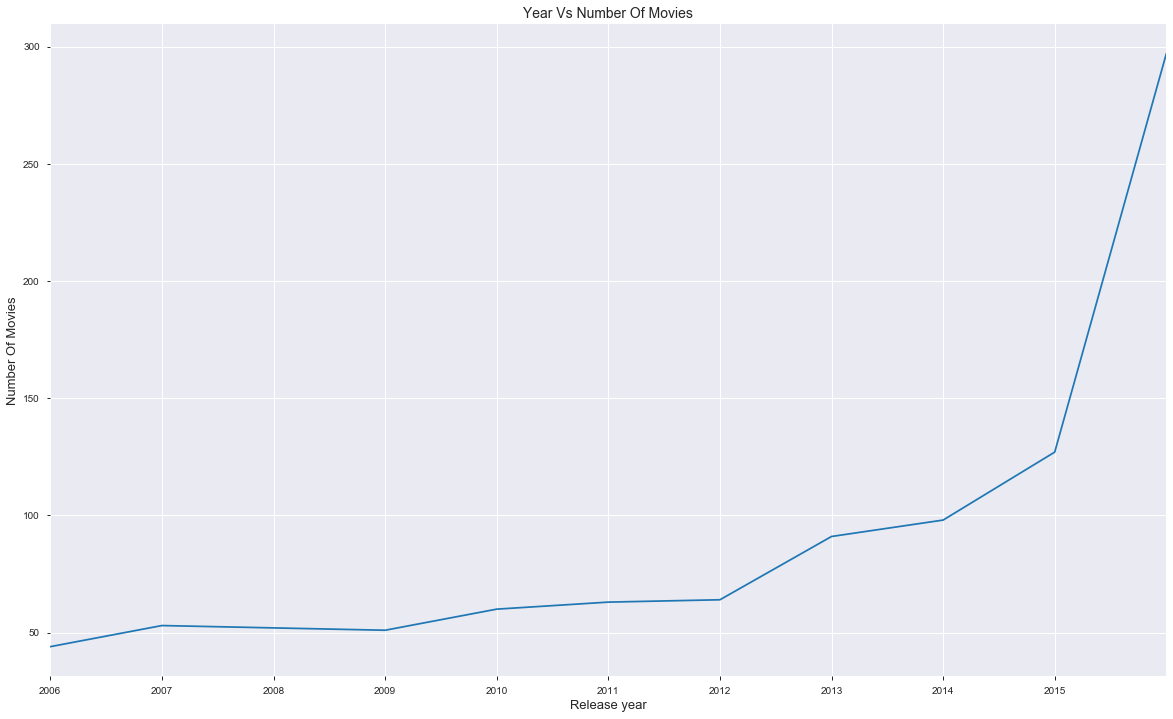

In [0]:
import numpy as np
# make group for each year and count the number of movies in each year 
data=df_movies.groupby('year').count()

# #make group of the data according to their release year and count the total number of movies in each year and pot.
df_movies.groupby('year').count()['rank'].plot(xticks = np.arange(2006,2016),figsize=[20,12])
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)


<a id=section501.2></a>
### 5.1.2 Movies by Genre

In [0]:
# Find Unique Genre in data frame

unique_genre=pd.concat([df_movies['genre_1'],df_movies['genre_2'],df_movies['genre_3']]).unique()
unique_genre=unique_genre[unique_genre!=None]
unique_genre

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy', 'Family', 'History', 'Music', 'Western',
       'War', 'Musical', 'Sport'], dtype=object)

Text(0.5, 0, 'Genre')

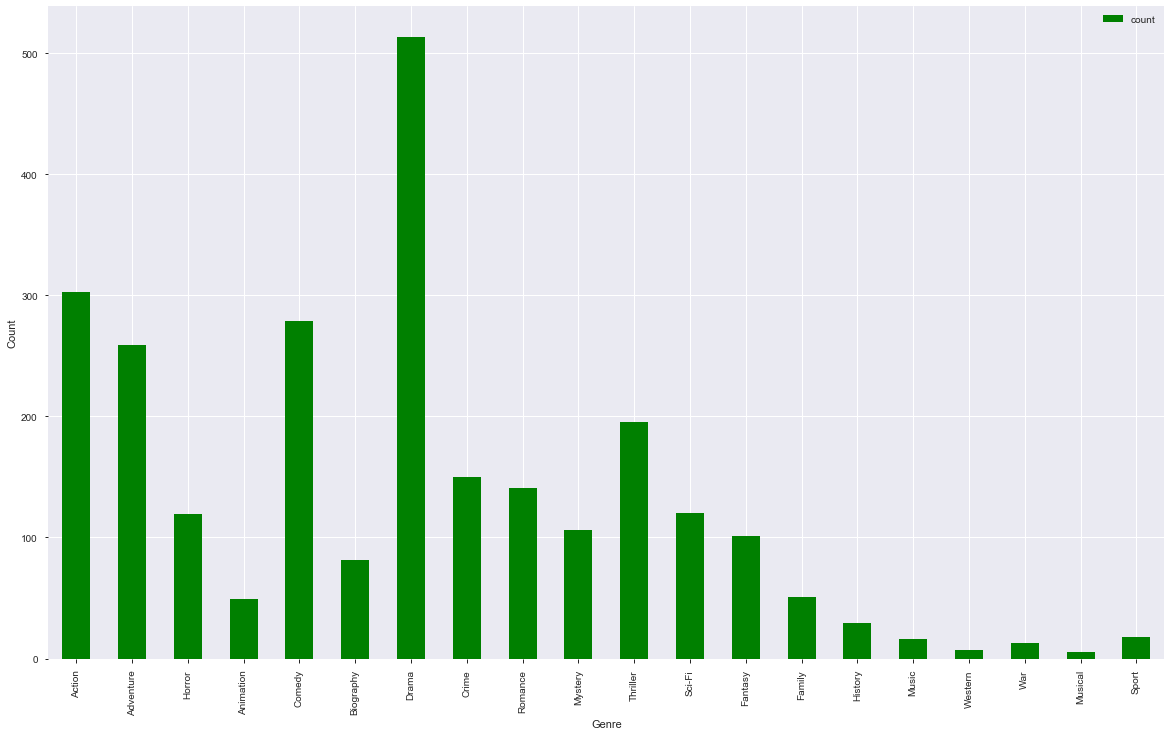

In [0]:
#Find out No. of Movies for each Genre
movie_byGenre=dict()

genre_movieCount = np.zeros(len(list(unique_genre)))
for genre in unique_genre:
    current_genre = (df_movies['genre_1'] == genre) | (df_movies['genre_2'] == genre) | (df_movies['genre_3'] == genre)
    movie_byGenre.update({genre : len(df_movies[current_genre])})
movies=pd.DataFrame(movie_byGenre.items(),columns=['genre','count'])
# plt.scatter(movies['genre'],movies['count'],marker='.',linewidths=10)
pd.DataFrame.from_dict(movies).plot(kind='bar',color='g',x='genre',y='count',figsize=[20,12])
plt.ylabel('Count')
plt.xlabel('Genre')

<a id=section501.3></a>
### 5.1.3 Top 10 rated movies

There are total 433 movies rated highest


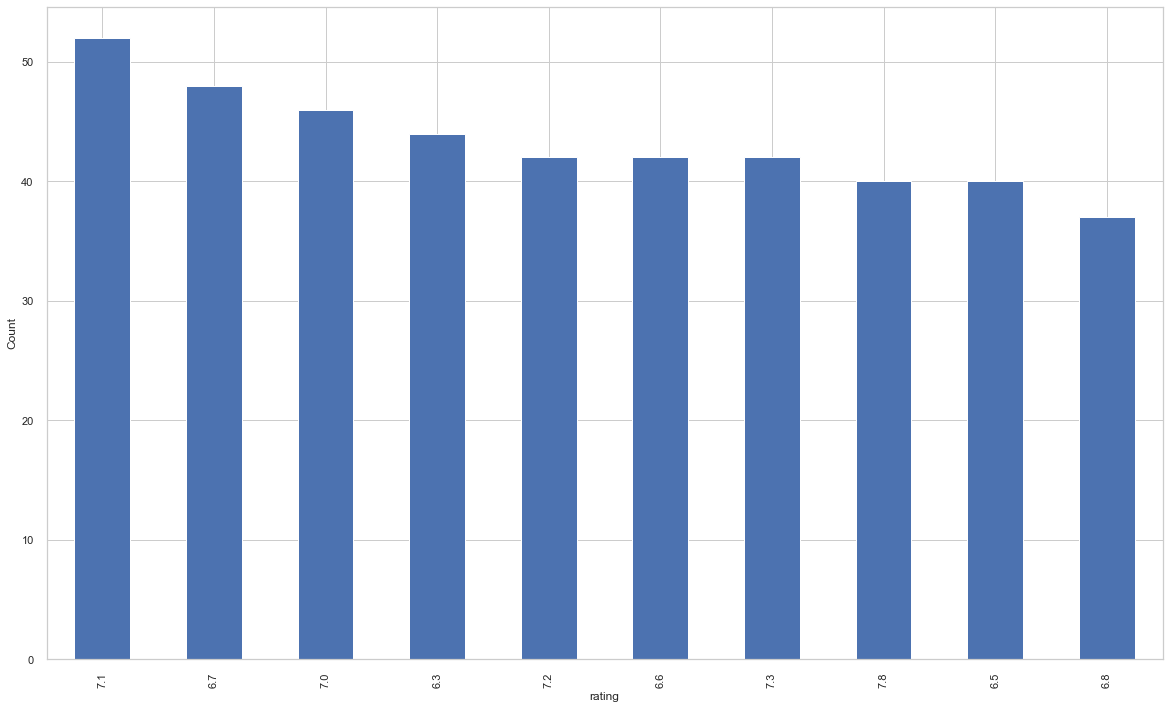

In [0]:
df_movies.groupby('rating')['title'].count().sort_values(ascending=True).nlargest(10).plot(kind='bar',figsize=[20,12])
plt.ylabel('Count')

# df_movies.groupby('metascore')['title'].count().sort_values(ascending=True).nlargest(10)
#df_movies.groupby('metascore')['title'].count().sort_values(ascending=True).nsmallest(10)
print("There are total {} movies rated highest".format(sum(df_movies.groupby('rating')['title'].count().sort_values(ascending=True).nlargest(10))))

<a id=section501.4></a>
### 5.1.4 Top 10 Movies Produced by Director

Text(0.5, 1.0, 'Successful Director')

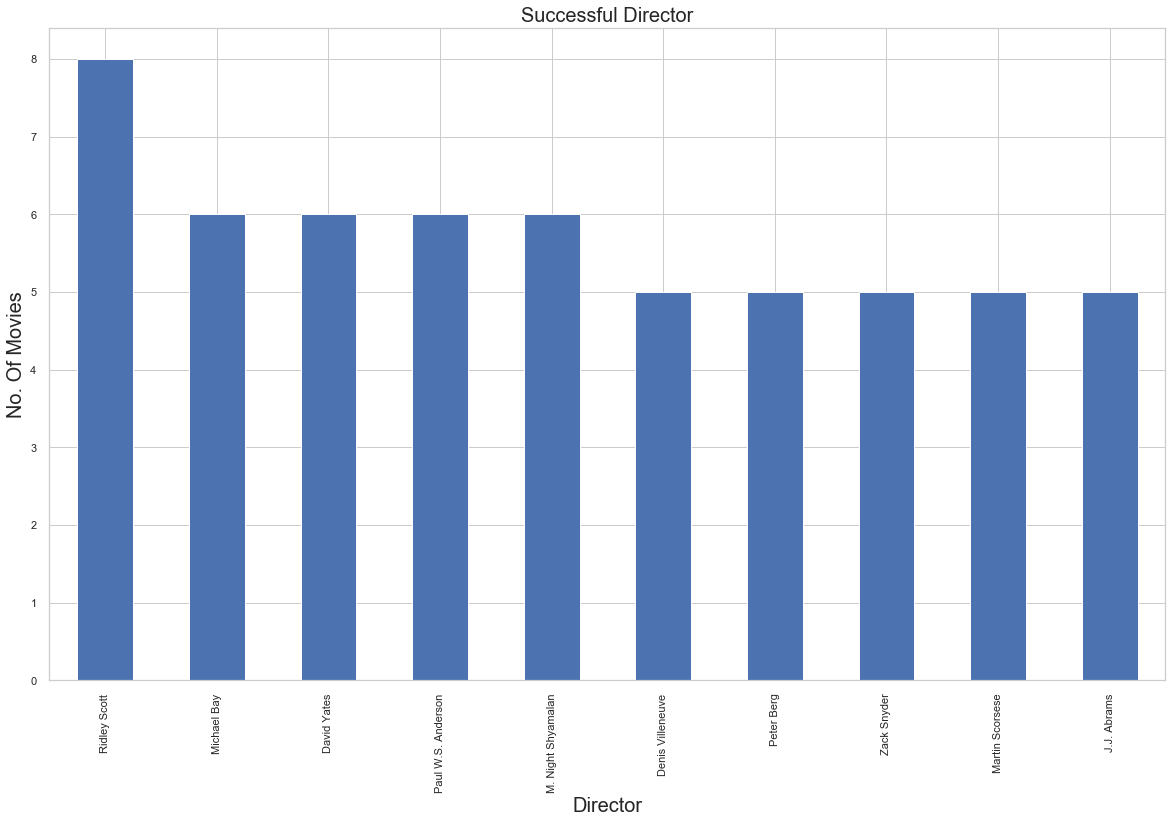

In [0]:
df_movies.groupby('director')['title'].count().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=[20,12])

df_movies.groupby('director')['title'].count().sort_values(ascending=False).nlargest(10)
plt.ylabel('No. Of Movies',fontsize=20)
plt.xlabel('Director',fontsize=20)
plt.title('Successful Director',fontsize=20)

<a id=section501.5></a>
### 5.1.5 Successful Director - Highest Revenue and good rating.

In [0]:
df_temp=df_movies.groupby('director')[['revenue','rating']].sum().sort_values(by='revenue',ascending=False).reset_index()
df_temp.head(10)


director  revenue  rating
0  J.J. Abrams        1683.45  37.9  
1  David Yates        1630.51  44.6  
2  Christopher Nolan  1515.09  43.4  
3  Michael Bay        1421.32  38.9  
4  Francis Lawrence   1299.81  28.1  
5  Joss Whedon        1082.27  15.5  
6  Jon Favreau        1025.60  29.7  
7  Zack Snyder        975.74   35.2  
8  Peter Jackson      860.45   29.9  
9  Gore Verbinski     829.82   27.4

<a id=section501.6></a>
### 5.1.6 Top Movies By Ratings

Text(0.5, 1.0, 'Top Rated Movies')

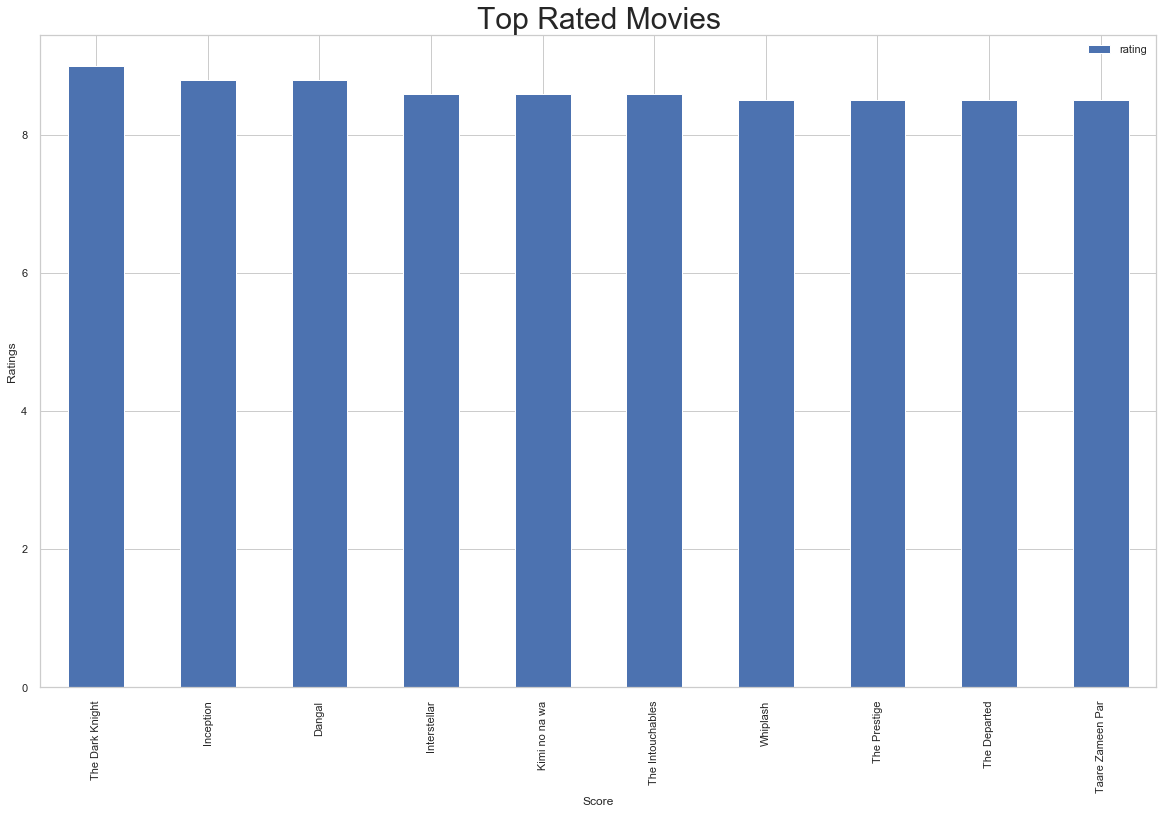

In [0]:
df_movies.sort_values(by='rating',ascending=False)[['title','rating']].head(10).set_index(['title']).plot(kind='bar',figsize=[20,12])

df_movies.sort_values(by='rating',ascending=False)[['title','rating']].head(10)
plt.xlabel("Score")
plt.ylabel('Ratings')
plt.title ("Top Rated Movies",fontsize = 30)

<a id=section501.7></a>
### 5.1.7 Top Movies By Revenue

['Star Wars: Episode VII - The Force Awakens', 'Avatar', 'Jurassic World', 'The Avengers', 'The Dark Knight', 'Rogue One', 'Finding Dory', 'Avengers: Age of Ultron', 'The Dark Knight Rises', 'The Hunger Games: Catching Fire'] [936.63, 760.51, 652.18, 623.28, 533.32, 532.17, 486.29, 458.99, 448.13, 424.65]


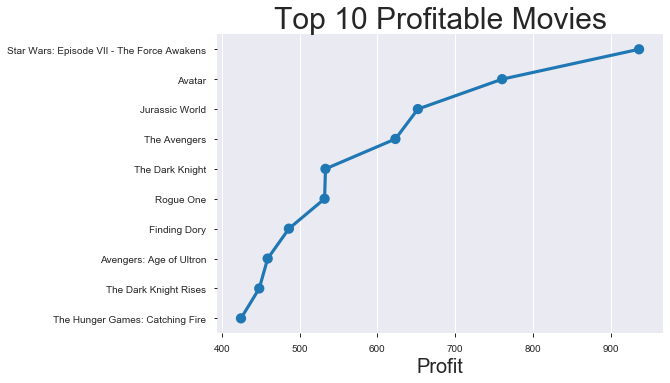

In [0]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info= pd.DataFrame(df_movies['revenue'].sort_values(ascending = False))
info['title'] = df_movies['title']
data = list(map(str,(info['title'])))
x = list(data[:10])
y = list(info['revenue'][:10])
print(x, y)
# #make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

# #setup the figure size
sns.set(rc={'figure.figsize':(40,30)})
# #setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 30)
ax.set_xlabel("Profit",fontsize = 20)
sns.set_style("darkgrid")

<a id=section501.8></a>
### 5.1.8 Top Movies by Actor

In [0]:
#Find out the unique actors
unique_actors=pd.concat([df_movies['actor_1'],df_movies['actor_2'],actors_df['actor_3']]).unique()
unique_actors=unique_actors[unique_actors!=None]
unique_actors

array(['Chris Pratt', 'Noomi Rapace', 'James McAvoy', ...,
       ' Bijou Phillips', ' Cassie Ventura', ' Thomas Middleditch'],
      dtype=object)

                 actor  count
49   Christian Bale     11   
59   Mark Wahlberg      11   
227  Adam Sandler       9    
63   Brad Pitt          9    
33   Denzel Washington  9    
68   Leonardo DiCaprio  9    
130  Jake Gyllenhaal    9    
4    Will Smith         9    
66   Robert Downey Jr.  8    
739   Rose Byrne        8    


Text(0.5, 0, 'Count')

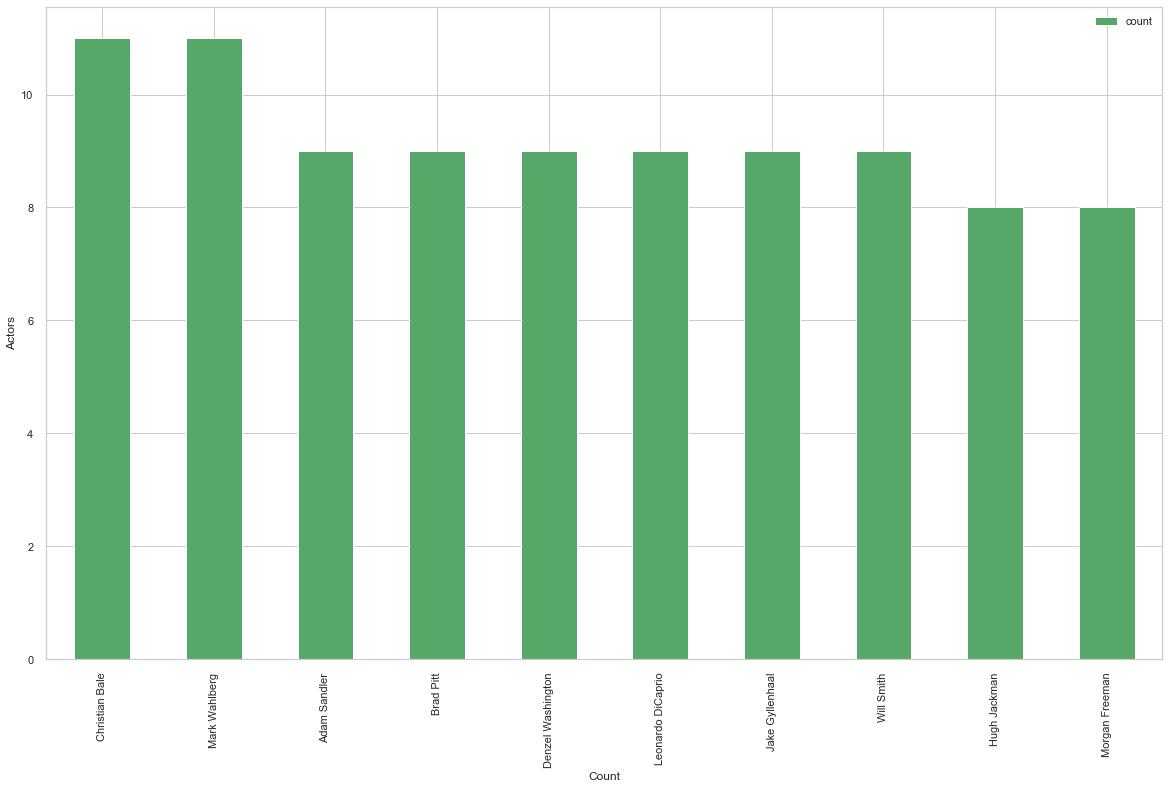

In [0]:
#Find out No. of Movies for each actor
movie_byActor=dict()

actor_movieCount = np.zeros(len(list(unique_actors)))
for actor in unique_actors:
    current_actor = (df_movies['actor_1'] == actor) | (df_movies['actor_2'] == actor) | (df_movies['actor_3'] == actor)
    movie_byActor.update({actor : len(df_movies[current_actor])})
actors=pd.DataFrame(movie_byActor.items(),columns=['actor','count']).sort_values('count',ascending=False)
print(actors.head(10))
actors=actors.sort_values(by='count',ascending=False)
pd.DataFrame.from_dict(actors).head(10).plot(kind='bar',color='g',x='actor',y='count',figsize=[20,12])
plt.ylabel('Actors')
plt.xlabel('Count')

<a id=section502></a>
### 5.2 Analysis Through Questions

<a id=section502.1></a>
### 5.2.1 Which Genre Has the Highest Revenue

Text(0.5, 1.0, 'Revenue share - Top 5 Genre')

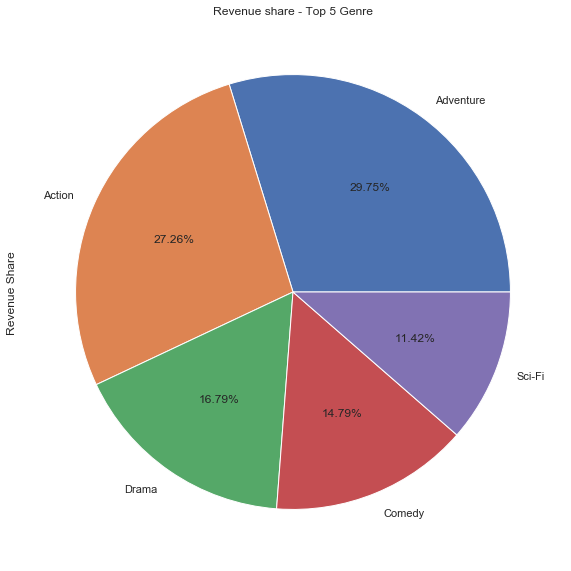

In [0]:
# Get revenue generated by Genre

revenue_ByGenre=np.zeros(len(unique_genre))
# print(unique_genre)
i=0
for genre in unique_genre:
    current_genre=(df_movies['genre_1'] == genre) | (df_movies['genre_2'] == genre) | (df_movies['genre_3'] == genre)
    revenue_ByGenre[i] = df_movies[current_genre].xs('revenue', axis=1).sum()/df_movies['revenue'].sum()*100
    i += 1

genre_revenue_df = pd.DataFrame(revenue_ByGenre, index=unique_genre, columns=['Revenue Share'])
genre_revenue_df


genre_revenue_df.sort_values('Revenue Share',ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(10,10))
plt.title("Revenue share - Top 5 Genre")

<a id=section502.2></a>
### 5.2.2 Which Genre Has The Highest Release Of Movies?

Text(0.5, 1.0, 'Total Movies - Top 5 Genre')

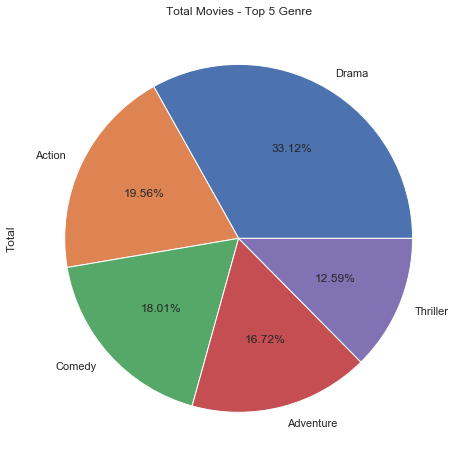

In [0]:
count_ByGenre=np.zeros(len(unique_genre))
# print(unique_genre)
i=0

for genre in unique_genre:
    current_genre=(df_movies['genre_1']==genre)|(df_movies['genre_2']==genre)|(df_movies['genre_3']==genre)
#     print(df_movies[current_genre])
    count_ByGenre[i]=len(df_movies[current_genre])
    i+=1

count_ByGenre_df=pd.DataFrame(count_ByGenre,index=unique_genre,columns=['Total'])
total_Genre=count_ByGenre.sum()
count_ByGenre_df['Total']=count_ByGenre_df['Total']/total_Genre*100

count_ByGenre_df.sort_values('Total',ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(10,8))
plt.title("Total Movies - Top 5 Genre")

<a id=section502.3></a>
### 5.2.3 What are the successful Genre

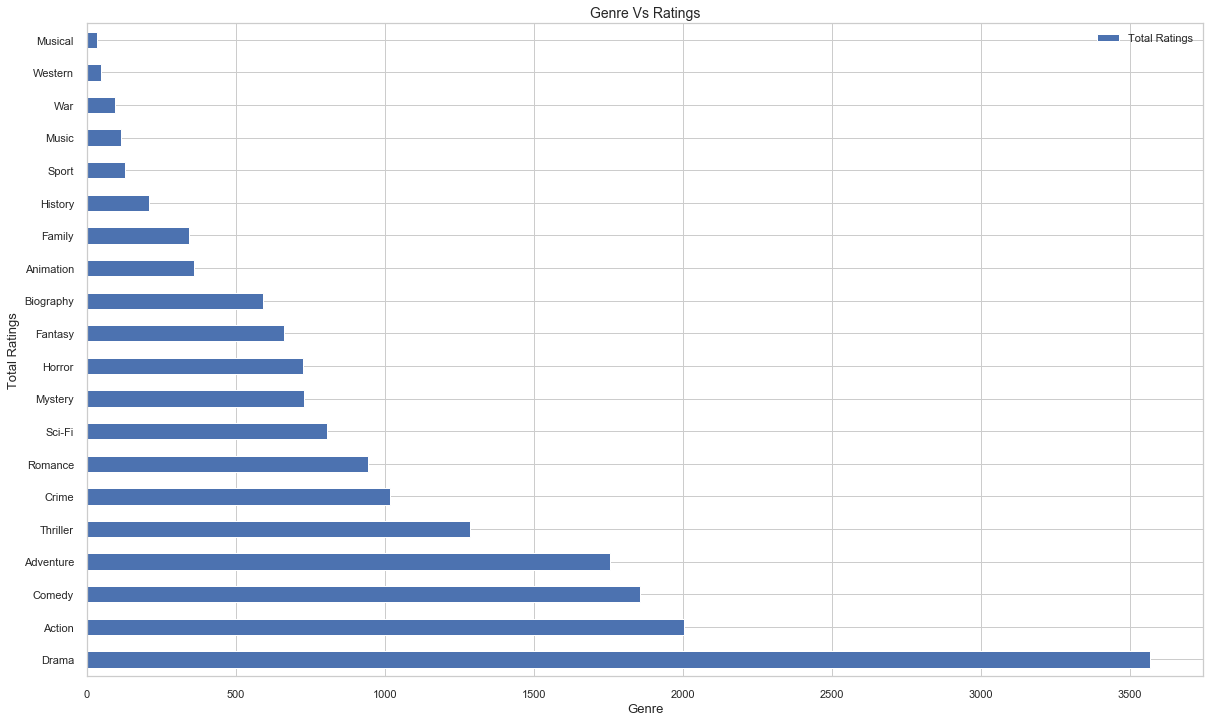

In [0]:
#Find out the successful genre

ratings_byGenre=np.zeros(len(unique_genre))
i=0
# print(df_movies)
for genre in unique_genre:
    current_genre=(df_movies['genre_1']==genre)|(df_movies['genre_2']==genre)|(df_movies['genre_3']==genre)
    ratings_byGenre[i]=df_movies[(df_movies['genre_1']==genre)|(df_movies['genre_2']==genre)|(df_movies['genre_3']==genre)][['rating']].sum()
    i +=1

ratings_byGenre_df=pd.DataFrame(ratings_byGenre, index=unique_genre,columns=['Total Ratings']).sort_values('Total Ratings',ascending=False)
ratings_byGenre_df.plot(kind='barh')
#setup the title and labels of the figure.
plt.title("Genre Vs Ratings",fontsize = 14)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Total Ratings',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(20,12)})
sns.set_style("whitegrid")

<a id=section502.4></a>
### 5.2.4 What are theTop 10 Rated Genre

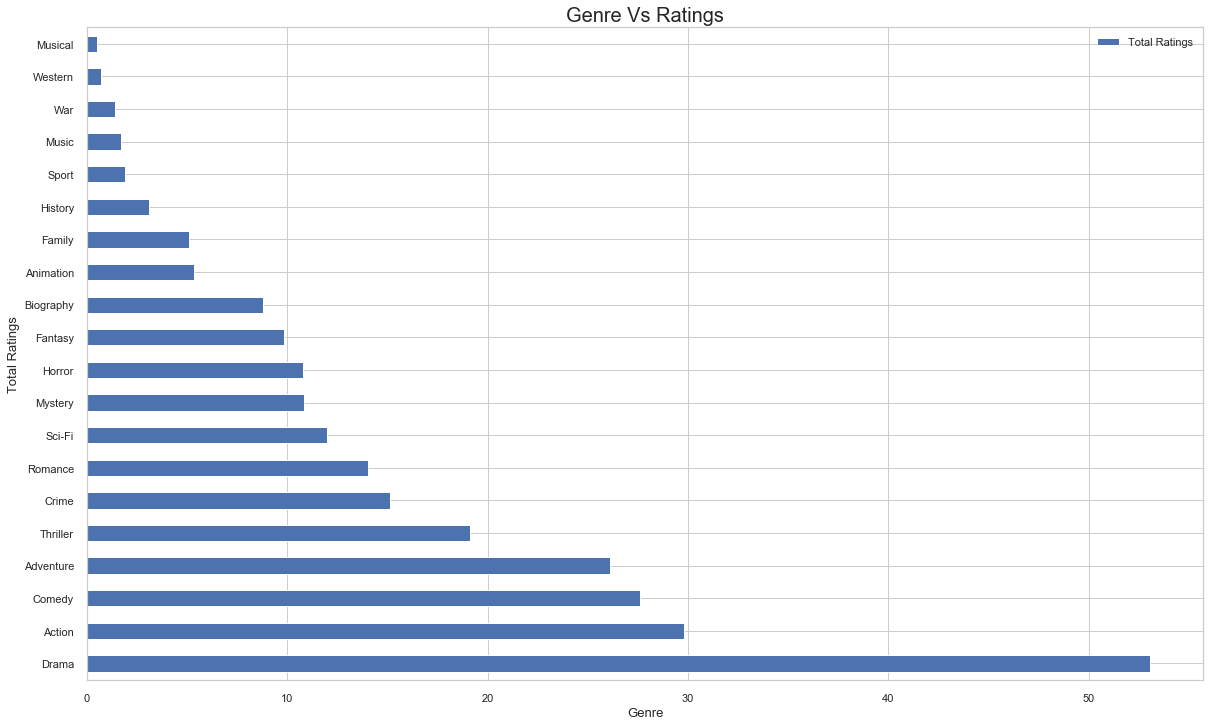

In [0]:
#Find out the successful genre

top_ratings_byGenre=np.zeros(len(unique_genre))
i=0
# print(df_movies)
for genre in unique_genre:
    current_genre=(df_movies['genre_1']==genre)|(df_movies['genre_2']==genre)|(df_movies['genre_3']==genre)
    top_ratings_byGenre[i]=df_movies[current_genre][['rating']].sum()/df_movies['rating'].sum()*100
    i +=1
top_ratings_byGenre_df=pd.DataFrame(top_ratings_byGenre, index=unique_genre,columns=['Total Ratings']).sort_values('Total Ratings',ascending=False)
top_ratings_byGenre_df.plot(kind='barh')
#setup the title and labels of the figure.
plt.title("Genre Vs Ratings",fontsize = 20)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Total Ratings',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(20,12)})
sns.set_style("whitegrid")

<a id=section502.4></a>
### 5.2.4 What movies have low ratings but high revenue

In [0]:
df_movies.sort_values('revenue',ascending=False).head(20)[['title','director', 'revenue', 'rating', 'genre_1']][df_movies['rating']<6]

Empty DataFrame
Columns: [title, director, revenue, rating, genre_1]
Index: []

<a id=section502.5></a>
### 5.2.5 What movies have High ratings but Low revenue

In [0]:
df_movies.sort_values('revenue',ascending=True)[['title','director', 'revenue', 'rating']][df_movies['revenue']>0.00][df_movies['rating']>6].head(10)

title          director  revenue  rating
677  Love, Rosie     Christian Ditter  0.01     7.2   
321  Lovesong        So Yong Kim       0.01     6.4   
68   Wakefield       Robin Swicord     0.01     7.5   
661  The First Time  Jon Kasdan        0.02     6.9   
490  Stake Land      Jim Mickle        0.02     6.5   
659  The Daughter    Simon Stone       0.03     6.7   
884  Equals          Drake Doremus     0.03     6.1   
618  Mr. Right       Paco Cabezas      0.03     6.3   
435  Filth           Jon S. Baird      0.03     7.1   
784  Before We Go    Chris Evans       0.04     6.9

<a id=section502.6></a>
### 5.2.6 Top revenue generated movies per year

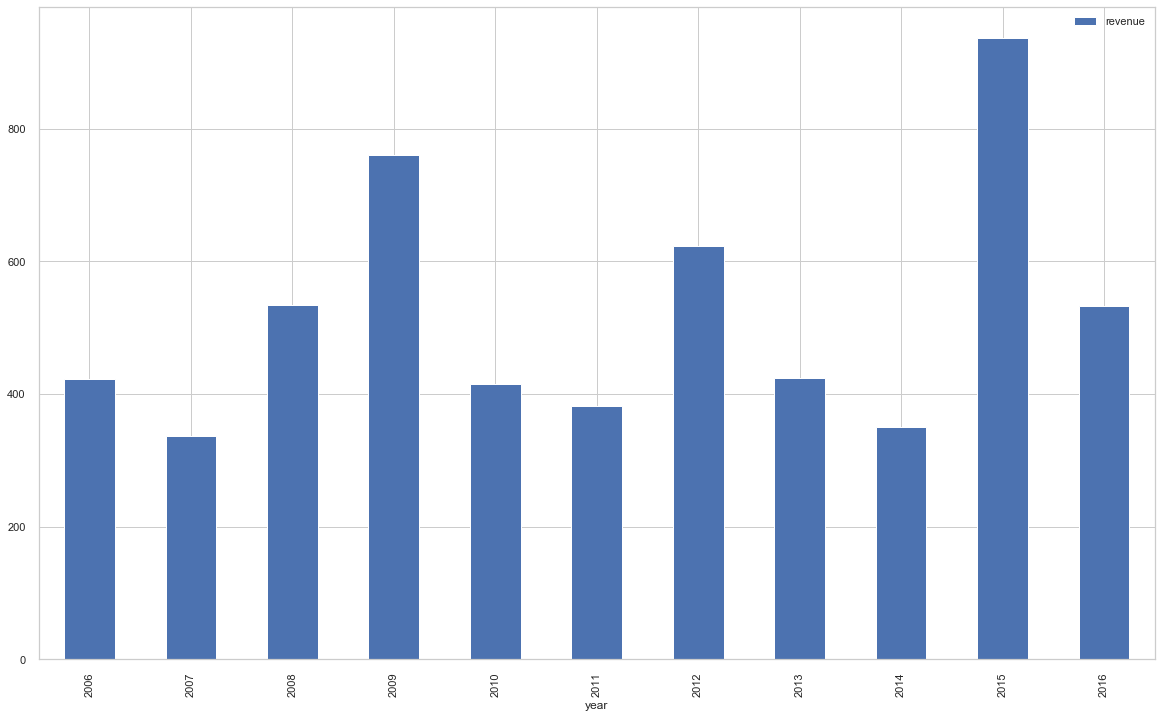

In [0]:
# df_movies.groupby('year')['revenue'].max()

df_movies.loc[df_movies.groupby('year')['revenue'].idxmax()][['year','title','revenue']].set_index('year').plot(kind='bar')

<a id=section502.7></a>
### 5.2.7 Highest revenue generated movies till date

In [0]:
df_movies[df_movies['revenue']==df_movies['revenue'].max()][['year','title','director', 'revenue']]

year                                       title     director  revenue
50  2015  Star Wars: Episode VII - The Force Awakens  J.J. Abrams  936.63

<a id=section502.8></a>
### 5.2.8 Trends

<a id=section502.8.1></a>
#### 5.2.8.1 Trends-Ratings

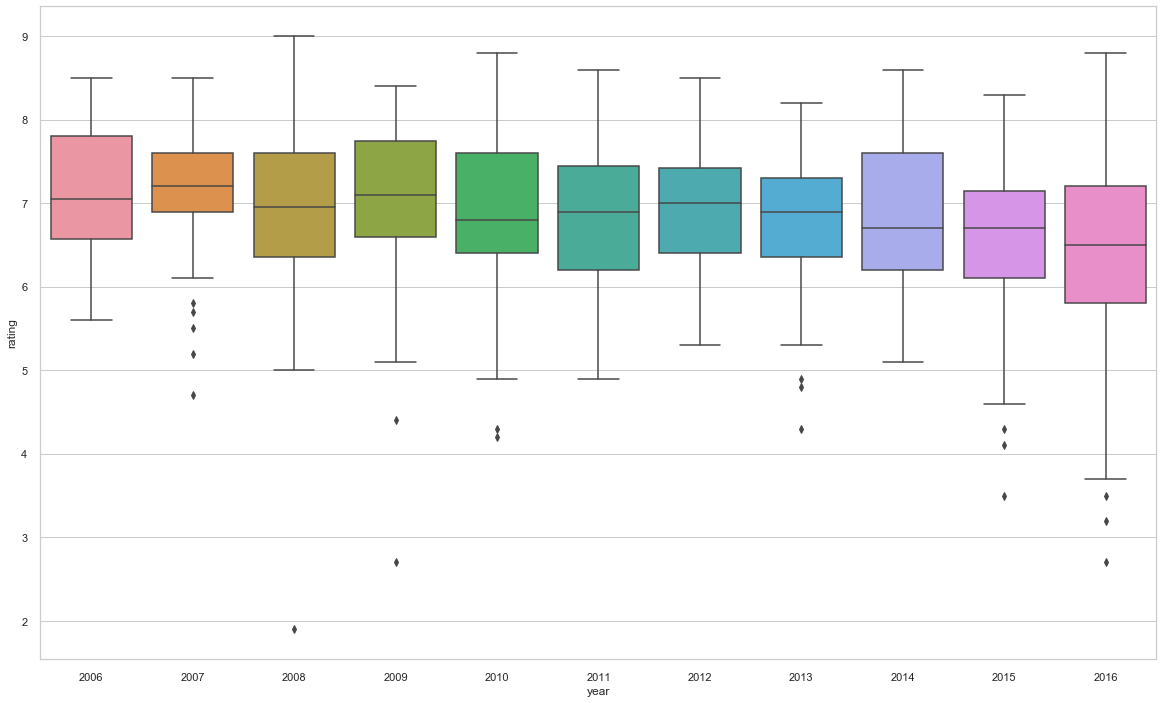

In [0]:
sns.boxplot(x='year',y='rating',data=df_movies)

<a id=section502.8.2></a>
#### 5.2.8.2 Trends-Revenue

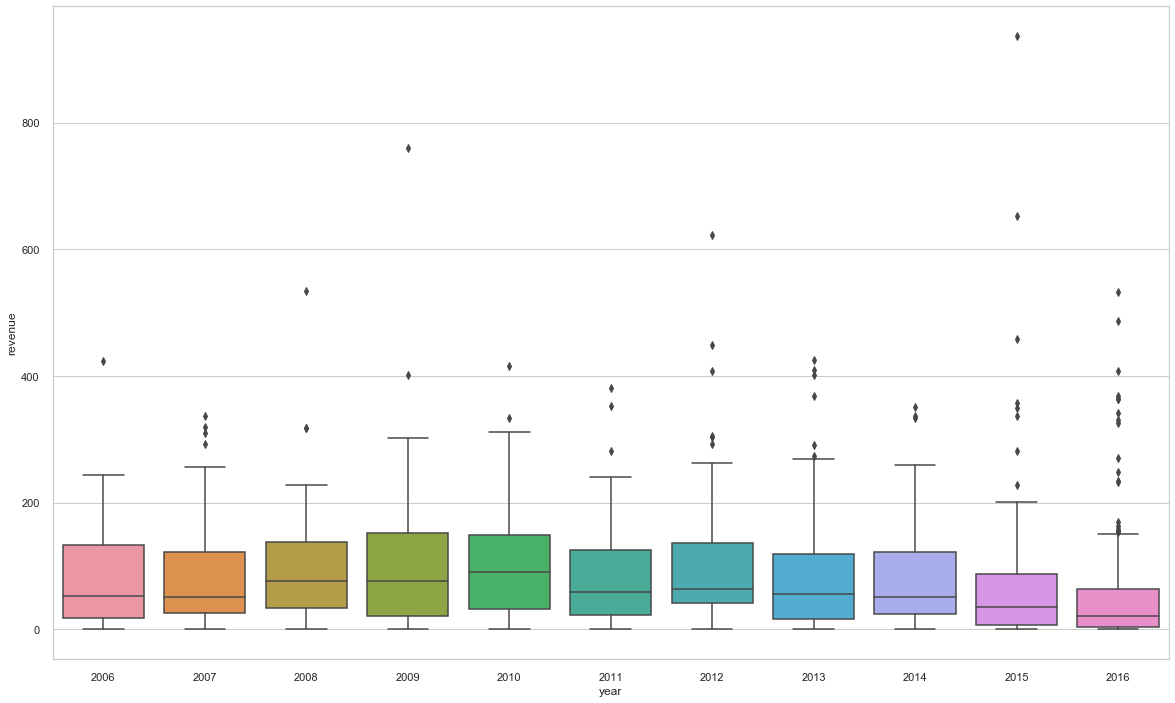

In [0]:
sns.boxplot(x='year',y='revenue',data=df_movies)

<a id=section502.8.3></a>
#### 5.2.8.3 Trends-Runtime

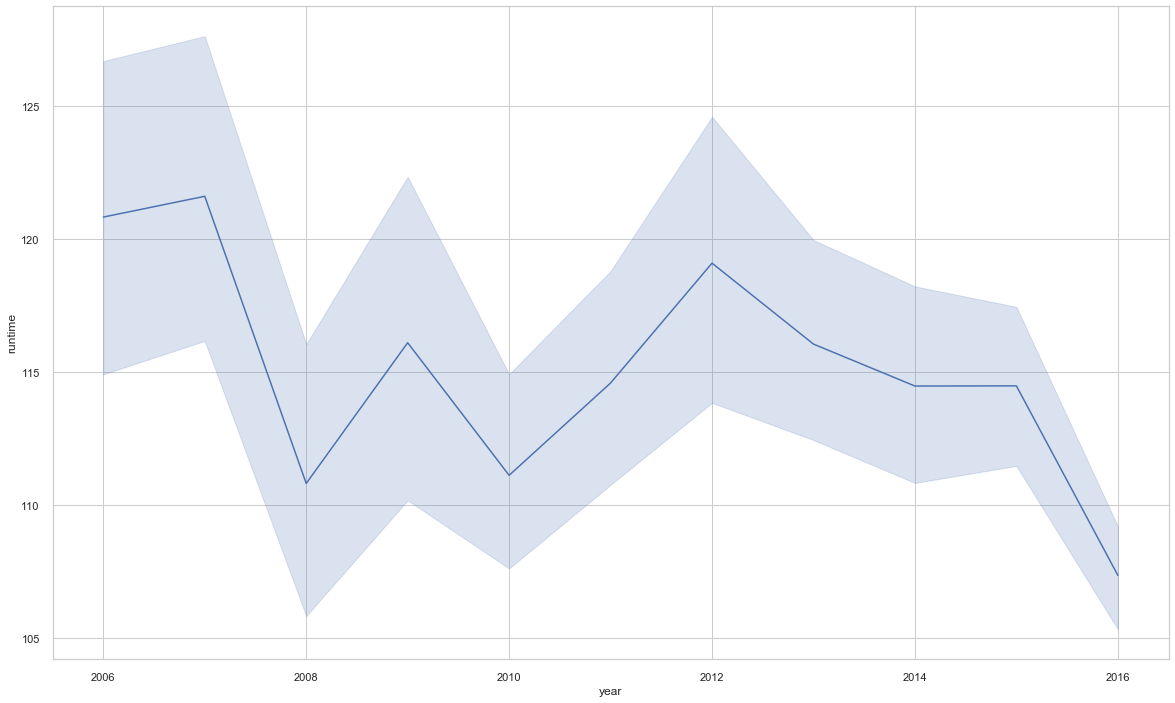

In [0]:
sns.lineplot(x='year',y='runtime',data=df_movies)

<a id=section6></a>
## 6. Conclusion

The data set gives us insights about the 1000 movies released in between 2006 - 2016.

1. There is the exponential growth of movies produced in the year of 2016
2. Drama is most popular Genre followed by Action, Comedy and Adventure.
3. The least favorite genres are Musical, Western and War.
4. Even though Drama was most popular Genre but Adventures movies collected most revenue.
5 "Love, Rosie" a comedy movie was got highest ratings where as revenue generated was lowest.
6. There are total 229 movies rated with highest ratings
7. "Star Wars: Episode VII - The Force Awakens" movies generated highest revenue where as "Christian Bale" was the most popular actor.
8  "J.J. Abrams" was the most successul director
9. The best movie in terms of rating and votes cast is "The Dark Knight" whereas in terms of revenue, it is "Star Wars: Episode VII - The Force Awakens".
10. "Love, Rosie" is high rated movie but received less revenue
11. It has been observed, runtime of movies are decreasing year on year basis.



